
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 50</p>
## <p style="text-align: center;">Due: Thursday, November 29th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please format **your filename to include your EID** (ex. ss324.ipynb or ss324_mj345.ipypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### EID 

### xr677
### wh7893

# Question 1 - Bayesian Belief Network (15 pts)

An example of Bayesian network for a futuristic medical diagnosis is shown below. This network might be used to diagnose whether a patient is suffering from a mere common cold (C) and/or the more dangerous Martian Death Flu (F), based on the patients' symptoms -- whether or not the patient has a runny nose (R), whether or not the patient has a headache (H), and whether or not the patient occasionally spontaneously bursts into flames (S) -- as well as relevant background information, namely whether or not he or she has previously visited Mars (V).    
All the six variables are binary with 1 representing "true" and 0 "false".

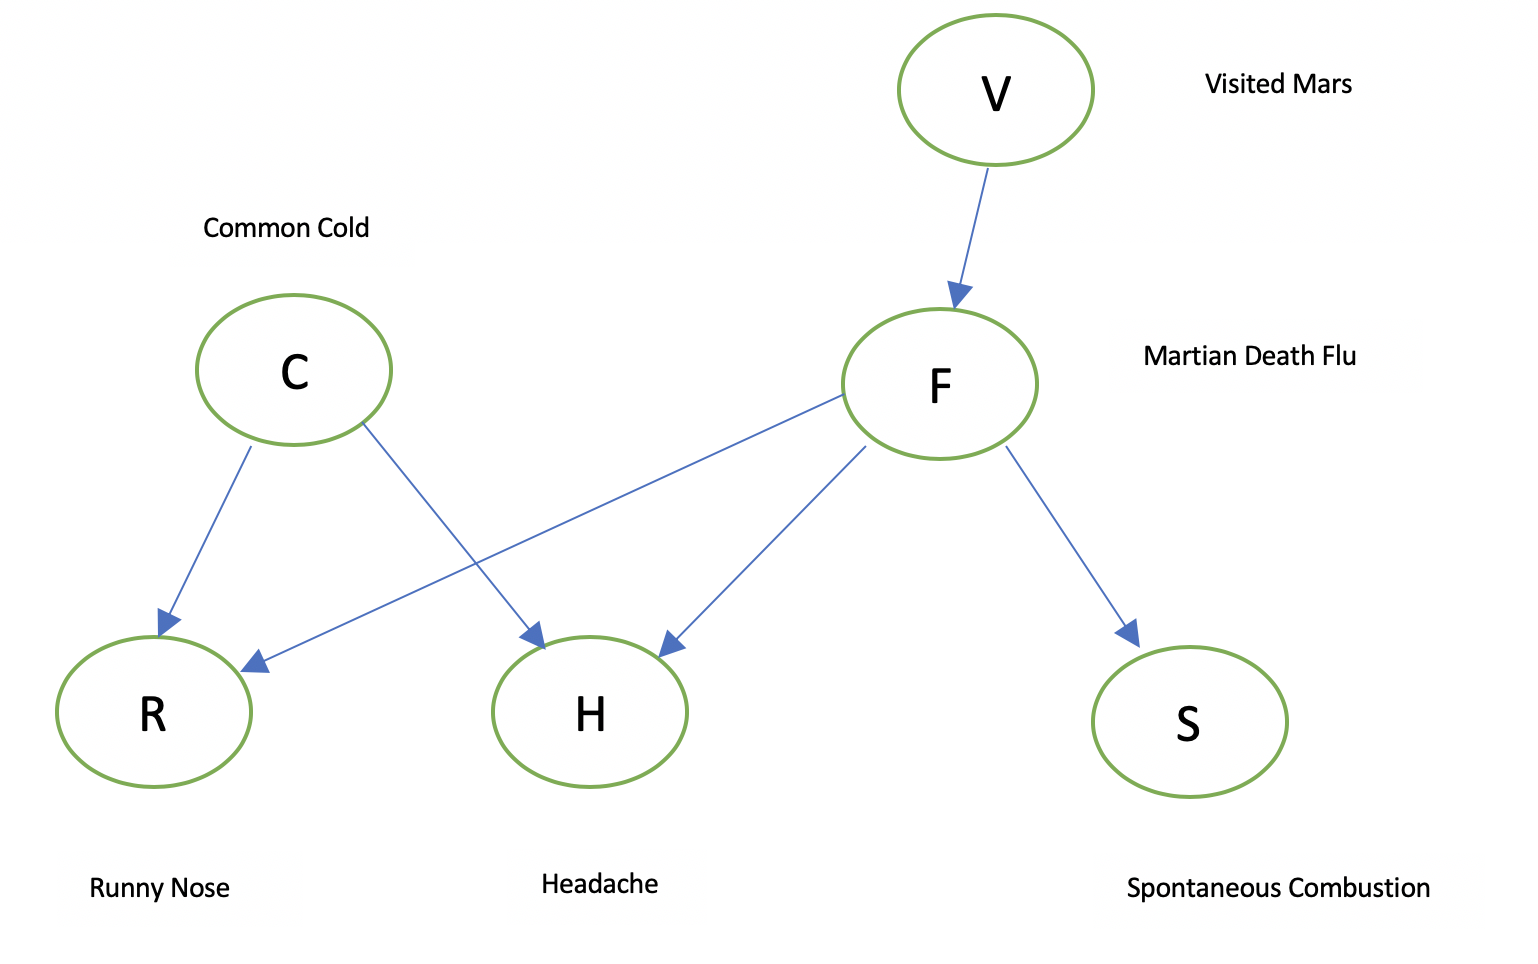

In [1]:
from IPython.display import Image
Image(filename='BBN.png',retina=True)

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(V = 1) = 0.0001   
P(C = 1) = 0.05  


P(F = 1 | V = 0) = 0.0  
P(F = 1 | V = 1) = 0.999  

P(R = 1 | C = 0, F = 0) = 0.05  
P(R = 1 | C = 0, F = 1) = 0.50  
P(R = 1 | C = 1, F = 0) = 0.90  
P(R = 1 | C = 1, F = 1) = 0.98

P(H = 1 | C = 0, F = 0) = 0.07  
P(H = 1 | C = 0, F = 1) = 0.98  
P(H = 1 | C = 1, F = 0) = 0.60  
P(H = 1 | C = 1, F = 1) = 0.99

P(S = 1 | F = 0) = 0.0  
P(S = 1 | F = 1) = 0.8 

For the given Bayesian network, Compute the following probabilities :

(a) (5 pts) Find the probability that a person has a headache.

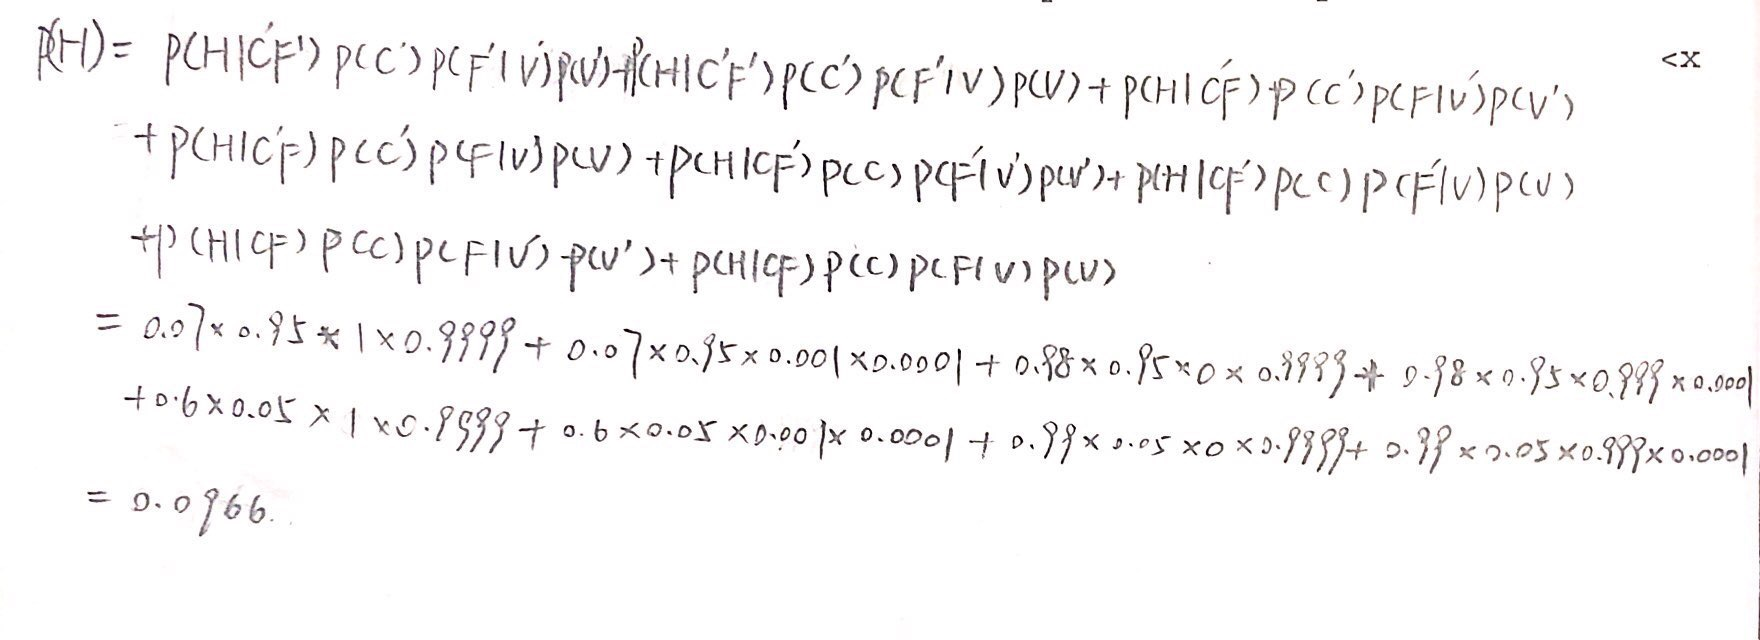

In [2]:
Image(filename='1-a.jpg',retina=True)

(b) (5 pts) Given that a person visited Mars, what is the probability that he has a runny nose?

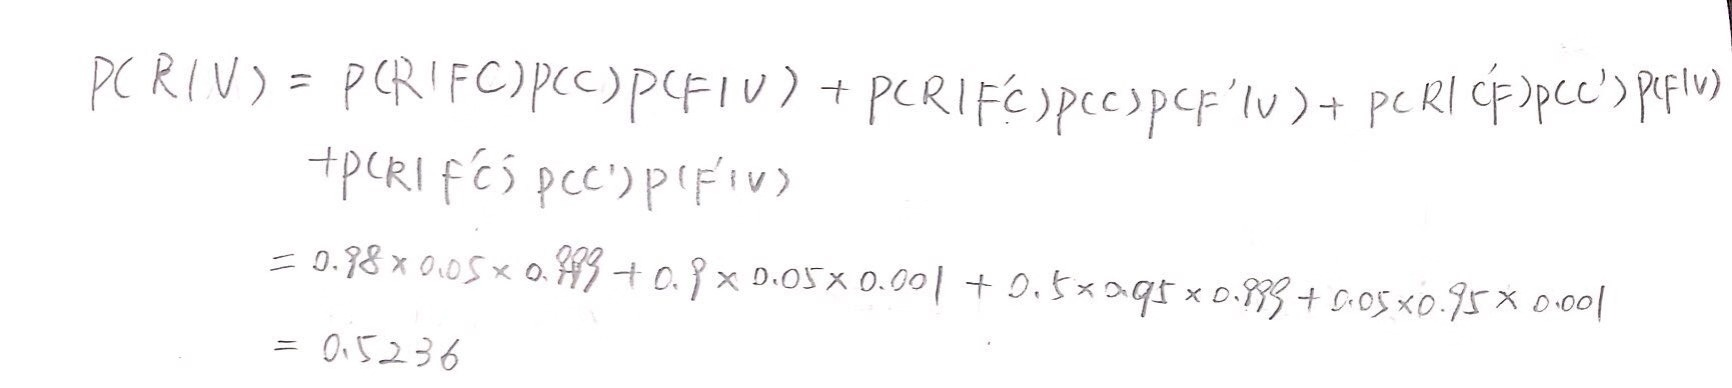

In [3]:
Image(filename='1-b.jpg',retina=True)

(c) (5 pts) Given that a person visited Mars and has a runny nose, what is the probability that the person has a common cold and not the Martian Death Flu?

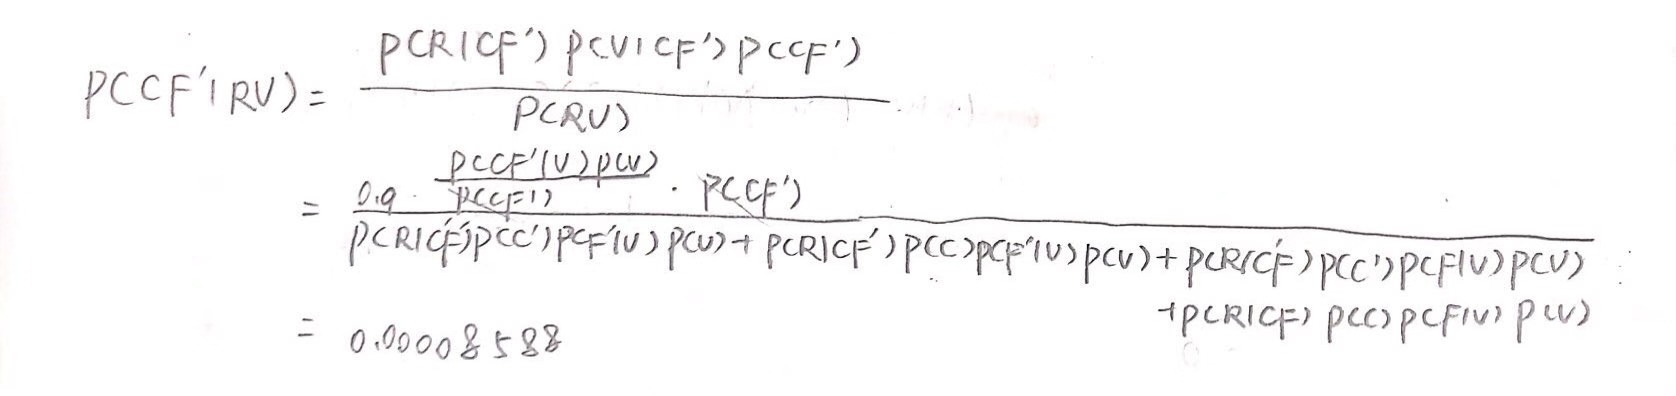

In [4]:
Image(filename='1-c.jpg',retina=True)

## Answer

# Question 2 - Support Vector Machine ( 15 points)

## Gender Recognition by voice

In this question, we will try to identify a voice as male or female. The dataset is taken from kaggle [Gender Recognition by Voice](https://www.kaggle.com/primaryobjects/voicegender/home). Go ahead and read it to understand the different variables.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv('voice.csv')

In [7]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [8]:
data.shape

(3168, 21)

In [9]:
X=data.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [10]:
from sklearn.preprocessing import LabelEncoder
y=data.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [13]:
print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (2122, 20) (2122,)
test (1046, 20) (1046,)


## Answer

(a) (6pts) Apply a linear SVM, using scikit-SVM. Specify how you chose the slack cost/penalty (‘C’ parameter)for the model. Maintain all other parameters as default. Hint: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier.
The code to get the training/testing data is provided below.


In [14]:
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [15]:
parameters = {'C':[0.01, 0.1,1,10,100,1000]}
svc = svm.SVC(kernel='linear')
clf = GridSearchCV(svc, parameters, cv=10)

In [16]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
clf.best_params_

{'C': 10}

In [18]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

(b) (6pts) Repeat (a) but with a Gaussian radial basis kernel.

In [19]:
parameters = {'C':[0.1,1,10,100,1000]}
svc = svm.SVC(kernel='rbf')
clf2 = GridSearchCV(svc, parameters, cv=10)

In [20]:
clf2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [21]:
clf2.best_params_

{'C': 1}

(3pts) Summarize the comparative performance (mean error rates) of the classifiers. What can you conclude? (Be brief.)

In [22]:
svc_linear = svm.SVC(kernel='linear',C=10)
svc_rbf=svm.SVC(kernel='rbf',C=1)


In [23]:
pred_linear=svc_linear.fit(X_train,y_train).predict(X_test)
pred_rbf=svc_rbf.fit(X_train,y_train).predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_linear)

array([[497,  10],
       [ 14, 525]])

In [25]:
confusion_matrix(y_test, pred_rbf)

array([[500,   7],
       [ 13, 526]])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_linear)

0.9770554493307839

In [27]:
accuracy_score(y_test, pred_rbf)

0.9808795411089866

In [28]:
mse_linear=mean_squared_error(y_test,pred_linear)
mse_rbf=mean_squared_error(y_test,pred_rbf)

In [29]:
print('linear mse:', mse_linear,'rbf mse:',mse_rbf)

linear mse: 0.022944550669216062 rbf mse: 0.019120458891013385


Conclusion

The accuracy score of the svm with rbf kernal is higher than the one with linear kernel, because RBF is better at handling with data in higher dimension.

# Question 3 - Ensembles ( 20 points)

In this question, we will compare the performance of different ensemble methods for classification problems: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier). 

We will use the dataset from the kaggle competition [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit). We will work on a smaller version of this dataset. The dataset is available on canvas as ensemble-dataset.csv. 
We will predict the probability that somebody will experience financial distress in the next two years. The dataset has already been split into train and test sets for you.

In [30]:
import pandas as pd
import numpy as np

In [31]:
data = pd.read_csv('ensemble-dataset.csv')

In [32]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents
0,0,1.062646,50,2,0.179032,3490,8,1,0,1,1
1,0,0.003591,83,0,0.000869,10352,14,0,0,0,0
2,0,1.000000,22,0,0.000000,100,1,0,0,0,0
3,0,0.000000,52,0,0.336355,7060,10,0,2,0,3
4,0,0.220152,54,0,0.235064,4083,15,0,0,0,1


In [33]:
data.shape

(5049, 11)

In [34]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3382, 10) (3382,)
test (1667, 10) (1667,)


## Answer

1. (5pts) Use a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict whether somebody will experience financial distress in the next two years. Find the best parameters (including *n_estimators* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data. You will need [predict_proba](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) for roc_auc_score. Plot the feature importance as well.


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [36]:
rf = RandomForestClassifier()
rfcv = GridSearchCV(rf,param_grid = { 
    'n_estimators': [200,300,400, 500],
    'criterion' :['gini', 'entropy']
}, cv=10)

In [37]:
pred=rfcv.fit(X_train,y_train).predict(X_test)

In [38]:
pred_proba=rfcv.predict_proba(X_test)

In [39]:
rfcv.best_params_

{'criterion': 'entropy', 'n_estimators': 500}

In [40]:
confusion_matrix(y_test, pred)

array([[1549,   10],
       [  96,   12]])

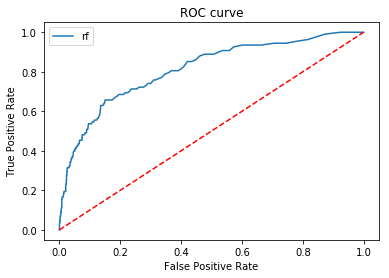

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc = roc_auc_score(y_test, pred)
fpr, tpr,threshold = roc_curve(y_test, pred_proba[:,1])

plt.figure()
plt.plot(fpr, tpr,label='rf' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [42]:
rf_importance=RandomForestClassifier(n_estimators= 500,criterion='entropy')

In [43]:
rf_importance.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

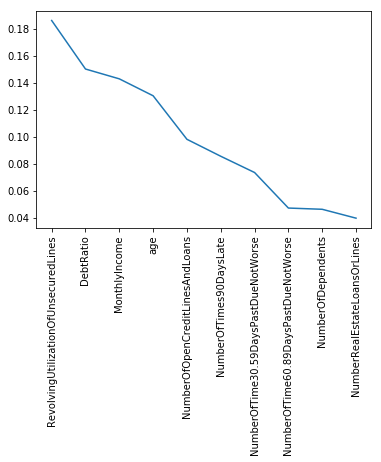

In [45]:
feature_importances = pd.DataFrame(rf_importance.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)
plt.plot(feature_importances)
plt.xticks(rotation=90)

2. (10pts) Use [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate,* and *max_depth (GBDT only)*), and report the confusion matrix and roc_auc_score on test data for each classifier. Also plot the feature importance for each classifier.

In [46]:
#GBDT 
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gbdt = GradientBoostingClassifier()
gbdtcv = GridSearchCV(gbdt,param_grid = {
    'learning_rate':[.001, .01, 0.1, 1, 10], 
    'n_estimators': [300,400, 500],
    'max_depth':[5,6,7]
}, cv=10)

In [48]:
pred_gbdt=gbdtcv.fit(X_train,y_train).predict(X_test)
pred_proba_gbdt=gbdtcv.predict_proba(X_test)
gbdtcv.best_params_

{'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 300}

In [49]:
confusion_matrix(y_test, pred_gbdt)

array([[1559,    0],
       [ 108,    0]])

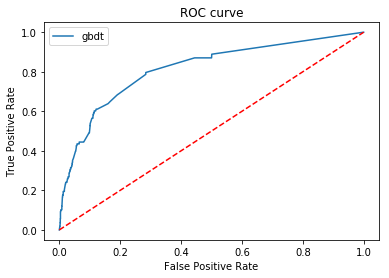

In [50]:
roc_auc_gbdt = roc_auc_score(y_test, pred_gbdt)
fpr_gbdt, tpr_gbdt,threshold_gbdt = roc_curve(y_test, pred_proba_gbdt[:,1])

plt.figure()
plt.plot(fpr_gbdt, tpr_gbdt,label='gbdt' % roc_auc_gbdt)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [51]:
importance_gbdt=GradientBoostingClassifier(learning_rate=0.001,n_estimators=300,max_depth=5)
importance_gbdt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

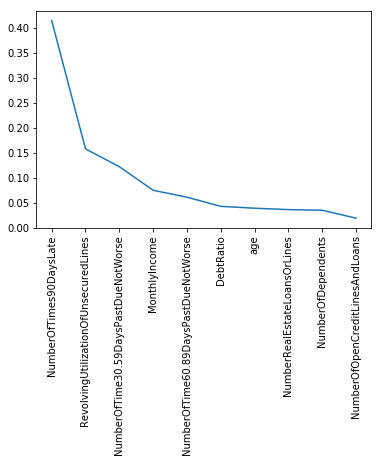

In [52]:
feature_importancesgbdt = pd.DataFrame(importance_gbdt.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)
plt.plot(feature_importancesgbdt)
plt.xticks(rotation=90)

In [53]:
#adaboost 
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
adacv = GridSearchCV(ada,param_grid = {
    'learning_rate':[.0001, .001, .01, 0.1, 1, 10, 100], 
    'n_estimators': [200,300,400, 500]
}, cv=10)

In [54]:
pred_ada=adacv.fit(X_train,y_train).predict(X_test)
pred_proba_ada=adacv.predict_proba(X_test)
adacv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [55]:
confusion_matrix(y_test, pred_ada)

array([[1545,   14],
       [  88,   20]])

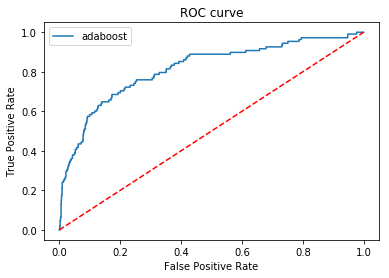

In [56]:
roc_auc_ada = roc_auc_score(y_test, pred_ada)
fpr_ada, tpr_ada,threshold_ada = roc_curve(y_test, pred_proba_ada[:,1])

plt.figure()
plt.plot(fpr_ada, tpr_ada,label='adaboost' % roc_auc_ada)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [57]:
importance_ada=AdaBoostClassifier(learning_rate=0.1,n_estimators=500)
importance_ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=500, random_state=None)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

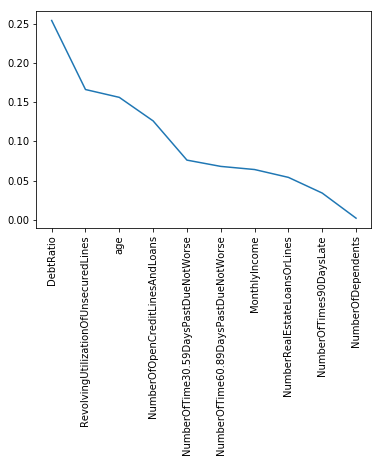

In [58]:
feature_importancesada = pd.DataFrame(importance_ada.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)
plt.plot(feature_importancesada)
plt.xticks(rotation=90)

3. (5pts) Point out one advantage and one disadvantage of Random Forest compared to GBDT.

Advantage: Random Forest generally runs faster than GBDT, because it trains each tree independently, while build trees one at a time, where each new tree helps to correct errors made by previously trained tree, and less likely to be overfit than GBDT.

Disadvantage: Random Forest is underperformed than GBDT in most cases, in other words, GBDT are more accurate in general.